In [23]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.feature_selection import SelectFwe
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFwe, f_regression

In [9]:
# as there are many warning from MLP conversion and some from setticklabels we want to disable them for a smoother reading flow
warnings.filterwarnings("ignore")

In [10]:
raw_data_red = pd.read_csv("winequality-red.csv", delimiter=';')
# show the created dataframe for red and white wine
display(raw_data_red.head())

# print the shape of the newly formed dataframe
raw_data_red.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)

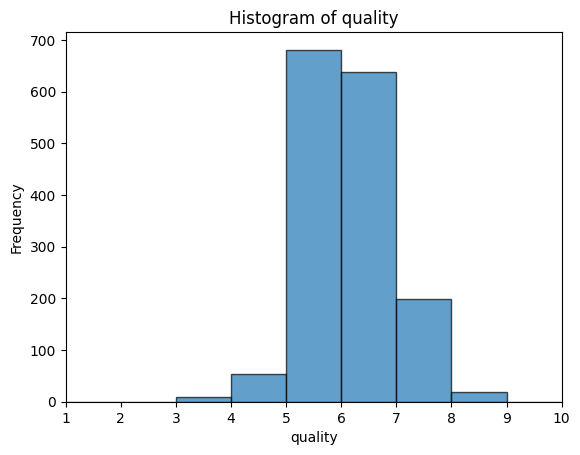

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
plt.hist(raw_data_red['quality'], bins=range(0, 12), edgecolor='k', alpha=0.7)
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.title('Histogram of quality')
plt.xlim(1, 10)
plt.show()

# show the number of entries for each value
value_counts = raw_data_red['quality'].value_counts()
print(value_counts)
raw_data_red.describe()

In [6]:
# check for missing data
missing_data = raw_data_red.isnull().sum()
print("Missing Data:")
missing_data

Missing Data:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No Data Missing, so no further Aktion needed

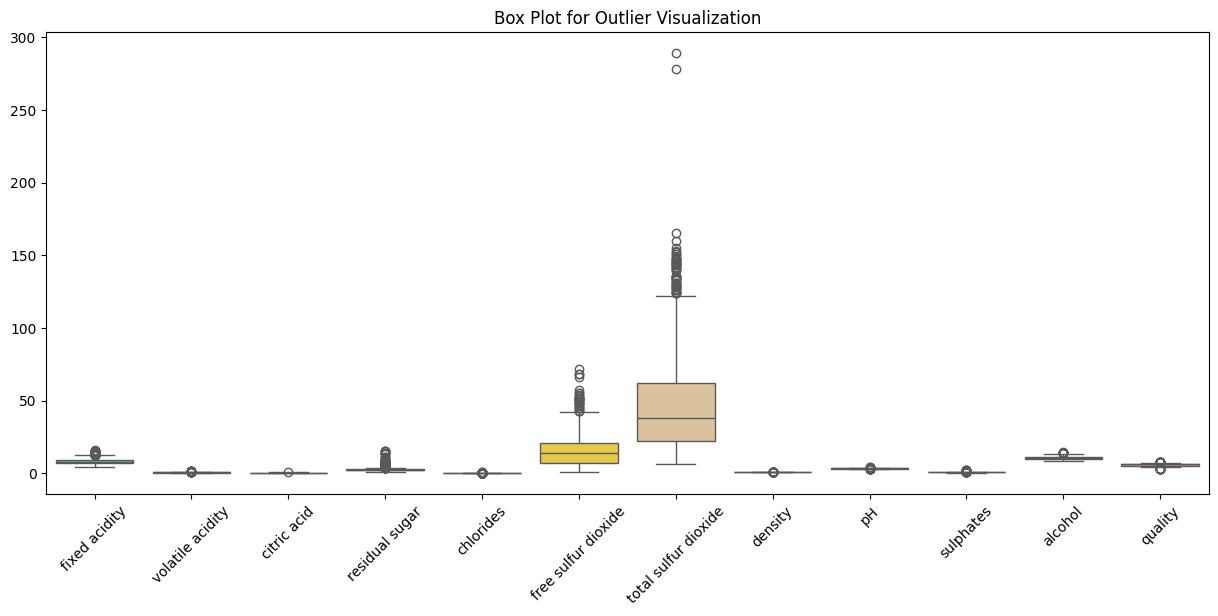

In [11]:
# detect and visualize outliers
plt.figure(figsize=(15, 6))
box_plot = sns.boxplot(data=raw_data_red, palette='Set2')
plt.title("Box Plot for Outlier Visualization")
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
plt.show()

In [9]:
# detect outliers based on mathematical functions

# select numerical columns for outlier detection
numerical_columns = raw_data_red.select_dtypes(include=[np.number])

# Set a threshold
threshold = 4.0

# IQR-based

# define the IQR-based outlier detection function
def detect_outliers_iqr(series, threshold = threshold):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return (series < lower_bound) | (series > upper_bound)

# exclude the string attribute from the outlier detection and perform calculation
iqr_outlier_mask = numerical_columns.apply(detect_outliers_iqr)

# count the number of rows with outliers
iqr_outlier_count = iqr_outlier_mask.any(axis=1).sum()

# display the count
print(f'There are {iqr_outlier_count} rows with outliers when using the IQR with a threshold of {threshold}.')


# Z-Score-based

# Calculate z-scores for each numerical column
z_scores = np.abs(zscore(numerical_columns))

# Create a mask for outliers
z_outlier_mask = (z_scores > threshold).any(axis=1)

# Count the number of rows with outliers
z_outlier_count = np.sum(z_outlier_mask)

# Display the count only once if there are outliers
print(f'There are {z_outlier_count} rows with outliers when using Z-Score with a threshold of {threshold}.')

There are 127 rows with outliers when using the IQR with a threshold of 4.0.
There are 62 rows with outliers when using Z-Score with a threshold of 4.0.


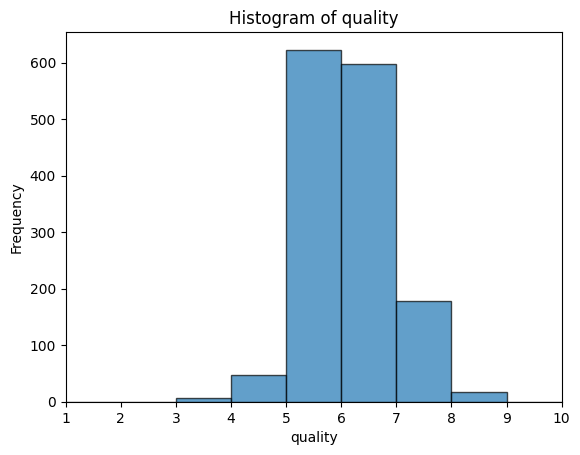

quality
5    623
6    598
7    179
4     48
8     17
3      7
Name: count, dtype: int64


In [10]:
# for testing reasons: create a dataset without outliers
raw_data_no_outliers = raw_data_red[~iqr_outlier_mask.any(axis=1)]

# plot a histogram
plt.hist(raw_data_no_outliers['quality'], bins=range(0, 12), edgecolor='k', alpha=0.7)
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.title('Histogram of quality')
plt.xlim(1, 10)
plt.show()

# show the number of entries for each value
value_counts = raw_data_no_outliers['quality'].value_counts()
print(value_counts)

30% of Red Wines with quality 3 were removed.
So there is a slight indication that there is a pattern. For the reason of missing domain knowledge alleged 'outliers' will remain in the data set. 

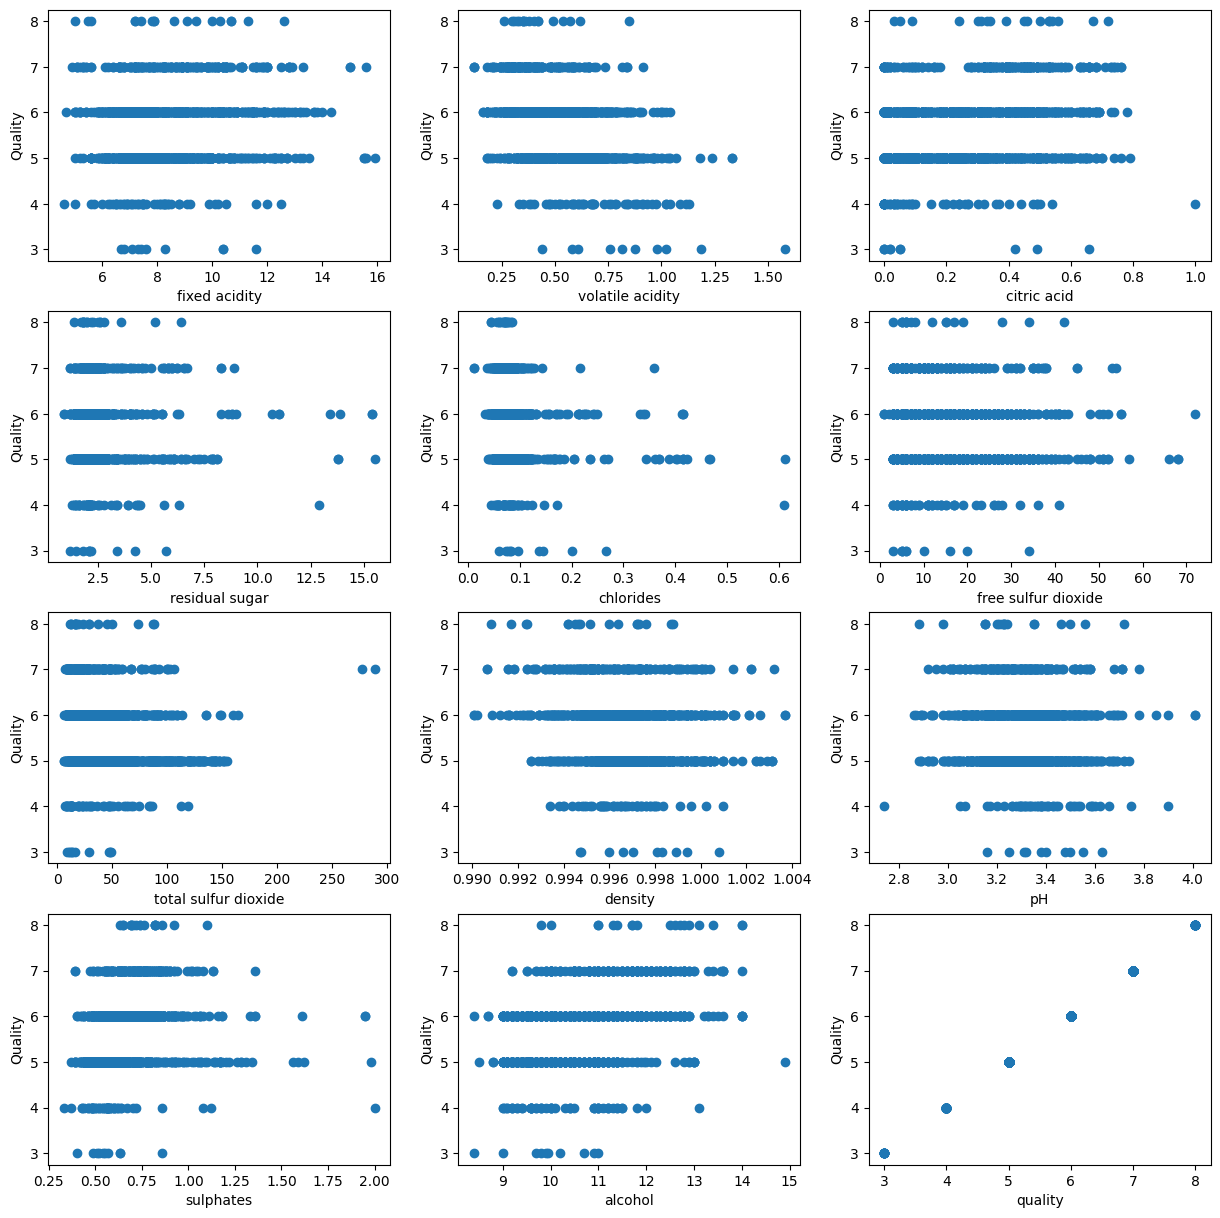

In [12]:
# create some plots to detect linear dependencies

# create a list of all columns that we could consider
#features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
features = raw_data_red.select_dtypes(include=[np.number])

# create a figure and specify its size
fig = plt.figure(figsize=(15,15))

# go through all features 
figure_index = 1
for feature in features:
    # add a subplot to the figure
    axs = fig.add_subplot(4,3,figure_index)
    
    # plot the feature as x
    axs.scatter(raw_data_red[feature], raw_data_red['quality'])
    
    # set the axis labels of the current subplot
    axs.set_xlabel(feature)
    axs.set_ylabel('Quality')
        
    # increase the figure index
    figure_index+=1

    
# show the plot
plt.show()

There seem to be no obvious linear dependencies. A slight positive linear dependency seems to be detectable between quality and alcohol. A slight negative linear dependnecy between quality and volatile acidity

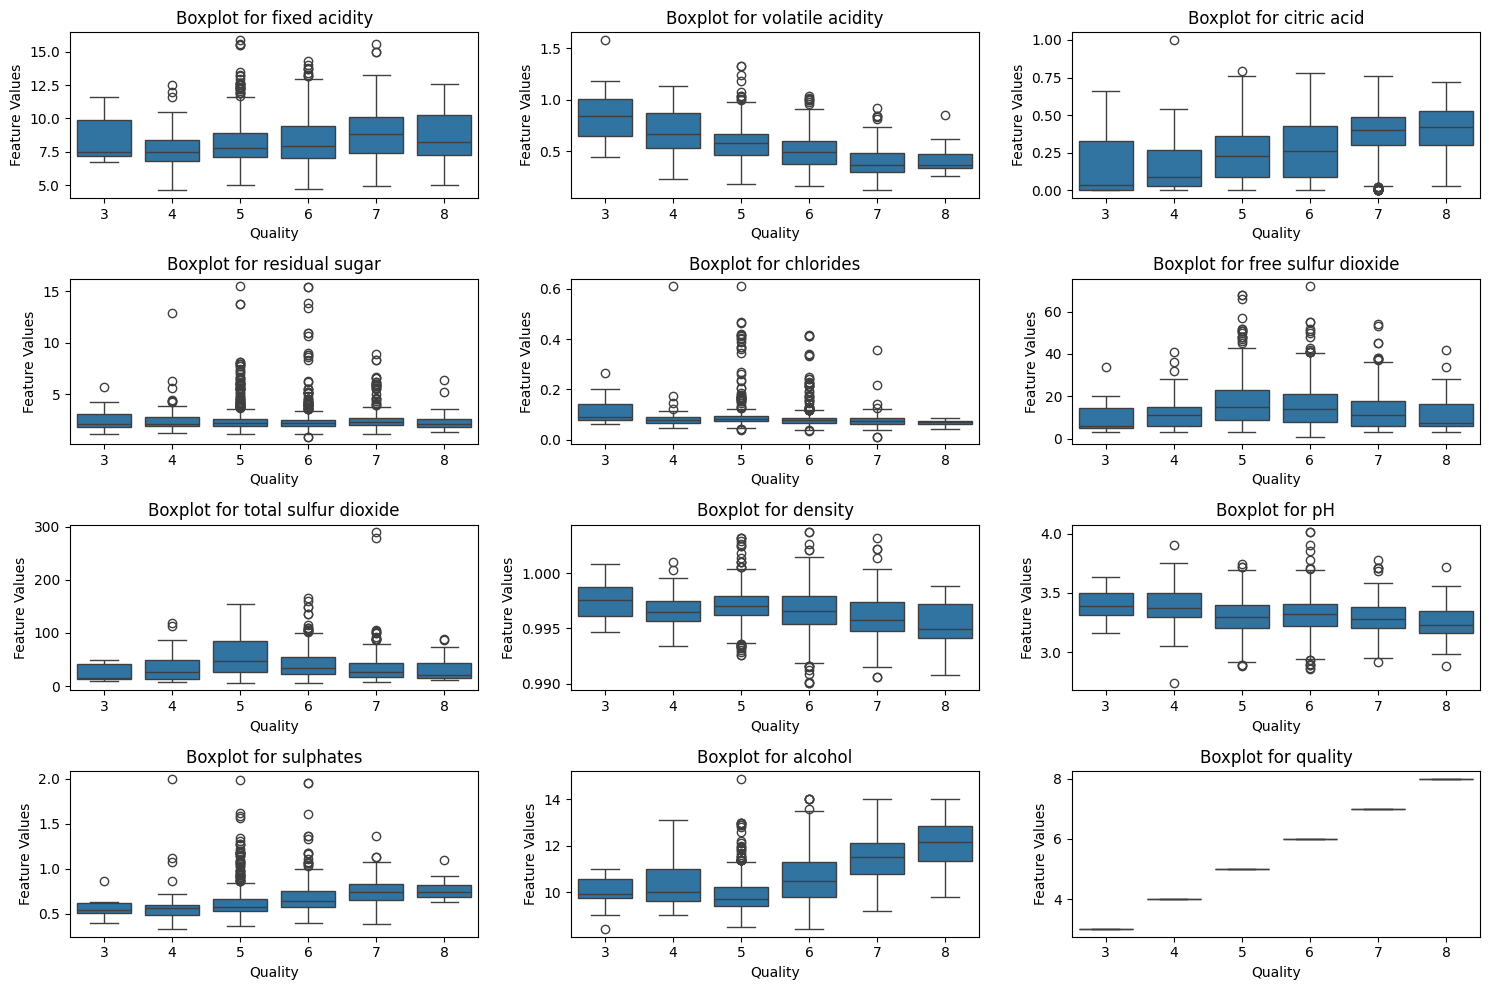

In [13]:
# find the boxplots of the features depending on the quality to see if there is a pattern 

def boxplot_dependencies(data, title): 
    
    # get numeric columns
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Set up subplots for each numeric feature in a 4x3 grid
    num_rows = 4
    num_cols = 3
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
    plt.title(title)
    
    # Flatten the axes for easy iteration
    axes = axes.flatten()
    
    # Create boxplots for each numeric feature using seaborn
    for i, feature in enumerate(numeric_columns):
        sns.boxplot(x='quality', y=feature, data=data, ax=axes[i])
        axes[i].set_title(f'Boxplot for {feature}')
    
    # Remove empty subplots if there are fewer features than subplots
    for j in range(num_rows * num_cols):
        if j >= len(numeric_columns):
            fig.delaxes(axes[j])
    
    # Set common labels and title for all subplots
    for ax in axes:
        ax.set_xlabel('Quality')
        ax.set_ylabel('Feature Values')
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

boxplot_dependencies(raw_data_red, "Red")

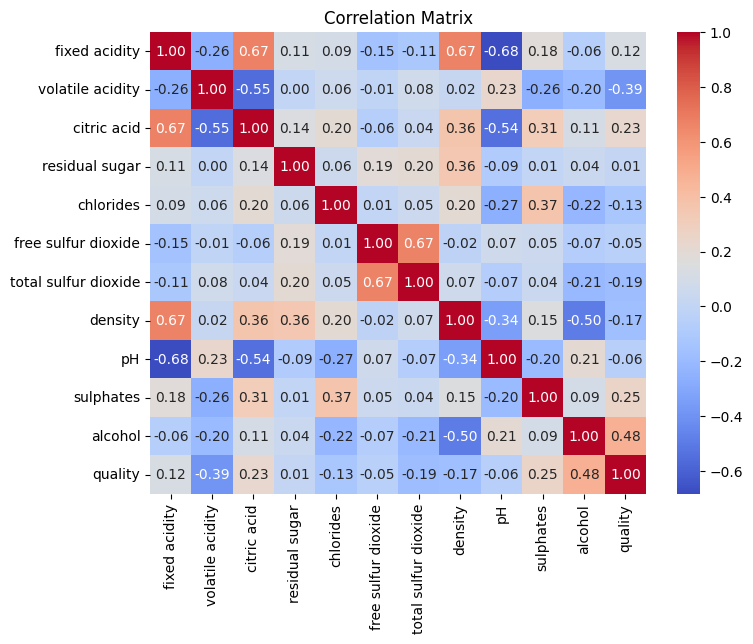

In [15]:
# in addition: explore the linear correlatin matrix

def corr_matrix(data): 
    
    # create correlation matrix
    correlation_matrix = data.corr()
    
    # create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    
    # plot the heatmap
    plt.title("Correlation Matrix")
    plt.show()

corr_matrix(raw_data_red)

In [16]:
# get the data ready for model selection and hyperparameter tuning

# create test- and train- (later used in cross-validation for creating a train- and val- dataset) dataset

# split attributes and label                                                      
wine_target = raw_data_red['quality']
wine_data = raw_data_red.drop(columns='quality')

# create split
data_train, data_test, target_train, target_test = train_test_split(wine_data, wine_target, test_size=0.2, random_state = 42, stratify=wine_target)

In [52]:
# this code becomes obsolete - maybe remove it? 
# reason: doesn't save all models for later evaluation

#scaling
preprocessor = StandardScaler()

#pipeline
training_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('selector', SelectFwe()),
    ('balancer', RandomOverSampler()),
    ('estimator', None)
])

models = {
    'LinearRegression': (LinearRegression(),{'estimator__fit_intercept': [True, False]}),
    'Ridge': (Ridge(), {'estimator__alpha': [0.1, 1.0, 10.0,50.0]}),
    'KNeighborsRegressor': (KNeighborsRegressor(), {'estimator__n_neighbors': [3, 5, 7]}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'estimator__max_depth': [None, 5, 10]}),
    'MLPRegressor': (MLPRegressor(), {'estimator__hidden_layer_sizes': [(100,), (50, 50), (25, 25, 25)], 'estimator__alpha': [0.0001, 0.001, 0.01]})
}
print('Einfach immer 5 raten')
print(r2_score(target_test,np.full(320,5)))
     
for model_name, (model,param_grid) in models.items():
    training_pipeline.set_params(estimator=model)
    r2= GridSearchCV(training_pipeline,param_grid, scoring='neg_mean_squared_error',n_jobs=-1)
    r2.fit(data_train,target_train)
    print(model_name)
    print(f"Best parameters: {r2.best_params_}")
    print(f"Best r2: {r2.best_score_:.4f}\n")

  

Einfach immer 5 raten
-0.617531327562201
LinearRegression
Best parameters: {'estimator__fit_intercept': True}
Best r2: -0.8526

Ridge
Best parameters: {'estimator__alpha': 50.0}
Best r2: -0.8403

KNeighborsRegressor
Best parameters: {'estimator__n_neighbors': 3}
Best r2: -0.6411

DecisionTreeRegressor
Best parameters: {'estimator__max_depth': None}
Best r2: -0.6005

MLPRegressor
Best parameters: {'estimator__alpha': 0.01, 'estimator__hidden_layer_sizes': (50, 50)}
Best r2: -0.6229



c:\Users\I568795\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
# define pipeline for training and prediction

# define numerical columns
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# preprocessor - scale - StandardScaler (z-Transformation)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
    ])

# pipeline - balance - RandomOverSampler (generates synthetic samples randomly) and estimator
training_pipeline_knnreg = Pipeline([
    ('preprocessing', preprocessor),
    ('balancer', RandomOverSampler()),
    ('estimator', KNeighborsRegressor())
])

training_pipeline_dtreg = Pipeline([
    ('preprocessing', preprocessor),
    ('balancer', RandomOverSampler()),
    ('estimator', DecisionTreeRegressor())
])

training_pipeline_linreg = Pipeline([
    ('preprocessing', preprocessor),
    ('balancer', RandomOverSampler()),
    ('estimator', LinearRegression())
])

training_pipeline_linreg = Pipeline([
    ('preprocessing', preprocessor),
    ('balancer', RandomOverSampler()),
    ('estimator', LinearRegression())
])

training_pipeline_ridgereg = Pipeline([
    ('preprocessing', preprocessor),
    ('balancer', RandomOverSampler()),
    ('estimator', Ridge())
])

training_pipeline_mlpreg = Pipeline([
    ('preprocessing', preprocessor),
    ('balancer', RandomOverSampler()),
    ('estimator', MLPRegressor())
])

'''
# check functions of pipeline
print(data_train.shape)

# get the balanced data
oversampled_data, oversampled_target = training_pipeline_knnreg.named_steps['balancer'].fit_resample(data_train, target_train)

# fit and transform the transformers in the pipeline on the training data
oversampled_data = training_pipeline_knnreg.named_steps['preprocessing'].fit_transform(oversampled_data)

# check the shape of the new data
print("Oversampled Data Shape:", oversampled_data.shape)
print("Oversampled Target Shape:", oversampled_target.shape)

# Display the head of the oversampled data
print("Head of Oversampled Data:")
display(pd.DataFrame(oversampled_data).head())

# Display the value counts of the oversampled target
print("Oversampled Target Value Counts:")
print(oversampled_target.value_counts())
'''

'\n# check functions of pipeline\nprint(data_train.shape)\n\n# get the balanced data\noversampled_data, oversampled_target = training_pipeline_knnreg.named_steps[\'balancer\'].fit_resample(data_train, target_train)\n\n# fit and transform the transformers in the pipeline on the training data\noversampled_data = training_pipeline_knnreg.named_steps[\'preprocessing\'].fit_transform(oversampled_data)\n\n# check the shape of the new data\nprint("Oversampled Data Shape:", oversampled_data.shape)\nprint("Oversampled Target Shape:", oversampled_target.shape)\n\n# Display the head of the oversampled data\nprint("Head of Oversampled Data:")\ndisplay(pd.DataFrame(oversampled_data).head())\n\n# Display the value counts of the oversampled target\nprint("Oversampled Target Value Counts:")\nprint(oversampled_target.value_counts())\n'

In [20]:
# define parameter distribution for Randomized Testing

param_dist_knnreg = {
    'estimator__n_neighbors': range(1, 21),  # Number of neighbors
    'estimator__weights': ['uniform', 'distance'],  # Weighting scheme
    'estimator__p': [1, 2],  # Power parameter for Minkowski distance
    'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'estimator__leaf_size': range(10, 41),  # Leaf size for tree-based algorithms
    'estimator__metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
}


param_dist_dtreg = {
    'estimator__max_depth': range(2, 21),  # Maximum depth of the tree
    'estimator__min_samples_split': range(2, 11),  # Minimum samples required to split an internal node
    'estimator__min_samples_leaf': range(1, 11),  # Minimum samples required at a leaf node
    'estimator__max_features': ['sqrt', 'log2', None],  # The number of features to consider when looking for the best split
    'estimator__splitter': ['best', 'random'],  # The strategy used to choose the split at each node
    'estimator__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  # The function to measure the quality of a split
}

param_dist_linear = {
    'estimator__fit_intercept': [True, False],
}

param_dist_ridge = {
    'estimator__alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'estimator__fit_intercept': [True, False],
    'estimator__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

param_dist_mlp = {
    'estimator__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'estimator__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'estimator__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'estimator__learning_rate': ['constant', 'invscaling', 'adaptive'],
}

In [21]:
# Define the RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Define the folds for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create the RandomizedSearchCV instance for KNeighborsRegression
knnreg_randomized_search_estimator = RandomizedSearchCV(training_pipeline_knnreg, param_distributions=param_dist_knnreg, scoring=rmse_scorer, cv=cv, random_state = 42)
knnreg_rmse_best = cross_val_score(knnreg_randomized_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -knnreg_rmse_best.mean()
print("Mean RMSE for best KNeighborsRegression:", mean_rmse)


# Create the RandomizedSearchCV instance for DecisionTreRegression
dtreg_randomized_search_estimator = RandomizedSearchCV(training_pipeline_dtreg, param_distributions=param_dist_dtreg, scoring=rmse_scorer, cv=cv, random_state = 42)
dtreg_rmse_best = cross_val_score(dtreg_randomized_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -dtreg_rmse_best.mean()
print("Mean RMSE for best DecisionTreeRegression:", mean_rmse)


# Create the RandomizedSearchCV instance for LinearRegression
linreg_randomized_search_estimator = RandomizedSearchCV(training_pipeline_linreg, param_distributions=param_dist_linear, scoring=rmse_scorer, cv=cv, random_state = 42)
linreg_rmse_best = cross_val_score(linreg_randomized_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -linreg_rmse_best.mean()
print("Mean RMSE for best LinearRegression:", mean_rmse)


# Create the RandomizedSearchCV instance for RidgeRegression
ridgereg_randomized_search_estimator = RandomizedSearchCV(training_pipeline_ridgereg, param_distributions=param_dist_ridge, scoring=rmse_scorer, cv=cv, random_state = 42)
ridgereg_rmse_best = cross_val_score(ridgereg_randomized_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -ridgereg_rmse_best.mean()
print("Mean RMSE for best RidgeRegression:", mean_rmse)


# Create the RandomizedSearchCV instance for MLPRegression
mlpreg_randomized_search_estimator = RandomizedSearchCV(training_pipeline_mlpreg, param_distributions=param_dist_mlp, scoring=rmse_scorer, cv=cv, random_state = 42)
mlpreg_rmse_best = cross_val_score(mlpreg_randomized_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -mlpreg_rmse_best.mean()
print("Mean RMSE for best MLPRegression:", mean_rmse)

Mean RMSE for best KNeighborsRegression: 0.5765995347279191
Mean RMSE for best DecisionTreeRegression: 0.703427763296897
Mean RMSE for best LinearRegression: 0.83990910984828
Mean RMSE for best RidgeRegression: 0.8434870642081126
Mean RMSE for best MLPRegression: 0.5819977370661361


In [22]:
# take a look at the parameters for the best model-variants
# and evaluate the model on the test set

print('===KNeighborsRegression===')
knnreg_randomized_search_estimator.fit(data_train, target_train)
display(knnreg_randomized_search_estimator.best_params_)
predictions = knnreg_randomized_search_estimator.predict(data_test)
mae = mean_absolute_error(target_test, predictions)
mse = mean_squared_error(target_test, predictions)
r2 = r2_score(target_test, predictions)
print("MAE: {}".format(mae))
print("RMSE: {}".format(sqrt(mse)))
print("R^2: {}".format(r2))

print('\n\n===DecisionTreeRegression===')
dtreg_randomized_search_estimator.fit(data_train, target_train)
display(dtreg_randomized_search_estimator.best_params_)
predictions = dtreg_randomized_search_estimator.predict(data_test)
mae = mean_absolute_error(target_test, predictions)
mse = mean_squared_error(target_test, predictions)
r2 = r2_score(target_test, predictions)
print("MAE: {}".format(mae))
print("RMSE: {}".format(sqrt(mse)))
print("R^2: {}".format(r2))

print('\n\n===LinearRegression===')
linreg_randomized_search_estimator.fit(data_train, target_train)
display(linreg_randomized_search_estimator.best_params_)
predictions = linreg_randomized_search_estimator.predict(data_test)
mae = mean_absolute_error(target_test, predictions)
mse = mean_squared_error(target_test, predictions)
r2 = r2_score(target_test, predictions)
print("MAE: {}".format(mae))
print("RMSE: {}".format(sqrt(mse)))
print("R^2: {}".format(r2))

print('\n\n===RidgeRegression===')
ridgereg_randomized_search_estimator.fit(data_train, target_train)
display(ridgereg_randomized_search_estimator.best_params_)
predictions = ridgereg_randomized_search_estimator.predict(data_test)
mae = mean_absolute_error(target_test, predictions)
mse = mean_squared_error(target_test, predictions)
r2 = r2_score(target_test, predictions)
print("MAE: {}".format(mae))
print("RMSE: {}".format(sqrt(mse)))
print("R^2: {}".format(r2))

print('\n\n===MLPRegression===')
mlpreg_randomized_search_estimator.fit(data_train, target_train)
display(mlpreg_randomized_search_estimator.best_params_)
predictions = mlpreg_randomized_search_estimator.predict(data_test)
mae = mean_absolute_error(target_test, predictions)

r2 = r2_score(target_test, predictions)
print("MAE: {}".format(mae))
print("RMSE: {}".format(sqrt(mse)))
print("R^2: {}".format(r2))

===KNeighborsRegression===


{'estimator__weights': 'distance',
 'estimator__p': 1,
 'estimator__n_neighbors': 7,
 'estimator__metric': 'euclidean',
 'estimator__leaf_size': 36,
 'estimator__algorithm': 'auto'}

MAE: 0.49454598549109097
RMSE: 0.7610047683716851
R^2: 0.1025072103879342


===DecisionTreeRegression===


{'estimator__splitter': 'best',
 'estimator__min_samples_split': 10,
 'estimator__min_samples_leaf': 10,
 'estimator__max_features': 'log2',
 'estimator__max_depth': 15,
 'estimator__criterion': 'poisson'}

MAE: 0.6329989785018995
RMSE: 0.8205557699740699
R^2: -0.04345186475731633


===LinearRegression===


{'estimator__fit_intercept': True}

MAE: 0.7163140667006397
RMSE: 0.9115422149612424
R^2: -0.28768543902203914


===RidgeRegression===


{'estimator__solver': 'lsqr',
 'estimator__fit_intercept': True,
 'estimator__alpha': 2.0}

MAE: 0.7174965790412149
RMSE: 0.9095952453330761
R^2: -0.282190560234457


===MLPRegression===


{'estimator__learning_rate': 'adaptive',
 'estimator__hidden_layer_sizes': (100, 50),
 'estimator__alpha': 0.01,
 'estimator__activation': 'relu'}

MAE: 0.5491710184795698
RMSE: 0.9095952453330761
R^2: 0.176839545713244


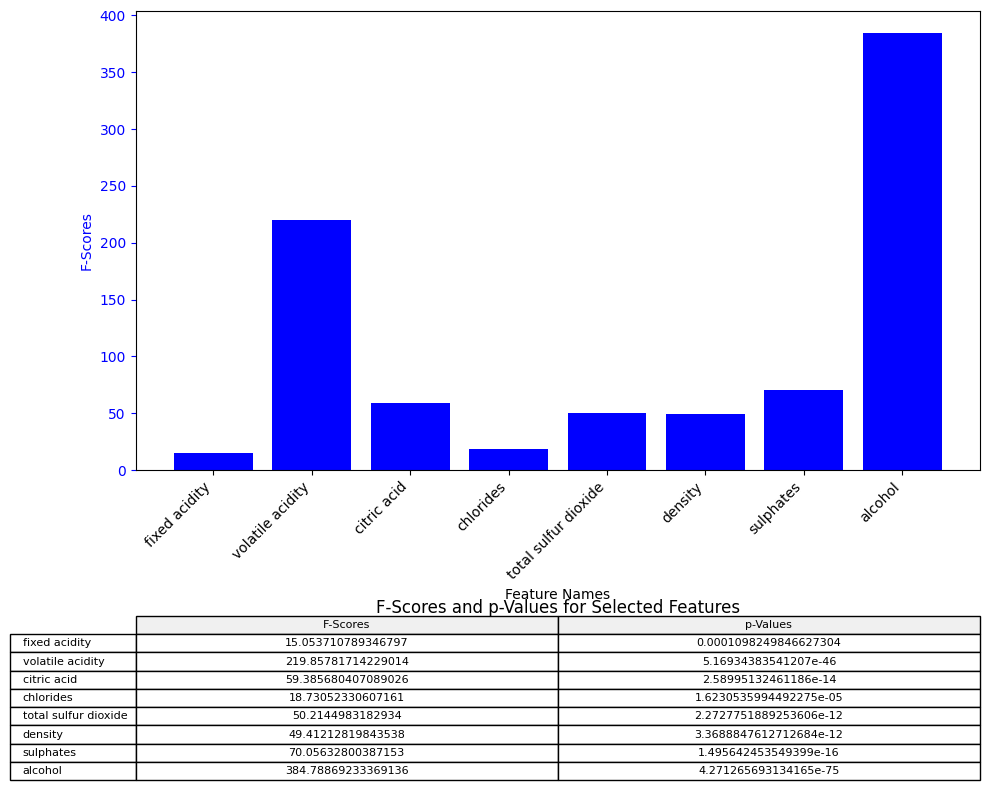

In [30]:
# Feature Engineering

# Store original feature names
original_feature_names = data_train.columns.tolist()

# Identify numeric columns
numeric_columns = data_train.select_dtypes(include=['number']).columns.tolist()

# Create a ColumnTransformer to scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
    ])

# Create a pipeline with the ColumnTransformer and SelectFwe
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectFwe(score_func=f_regression, alpha=0.01))
])

# Fit and transform the data
X_selected = pipeline.fit_transform(data_train, target_train)

# Get selected feature indices
selected_indices = pipeline.named_steps['selector'].get_support(indices=True)

# Get F-scores and p-values for all features
f_scores, p_values = f_regression(data_train, target_train)

# Extract F-scores and p-values for selected features
selected_f_scores = f_scores[selected_indices]
selected_p_values = p_values[selected_indices]

# Get corresponding feature names after preprocessing
selected_feature_names = [original_feature_names[i] for i in selected_indices]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Bar plot for F-scores
ax1.bar(selected_feature_names, selected_f_scores, label='F-Scores', color='b')
ax1.set_xlabel('Feature Names')
ax1.set_ylabel('F-Scores', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticklabels(selected_feature_names, rotation=45, ha='right')

# Table
table_data = pd.DataFrame({'F-Scores': selected_f_scores, 'p-Values': selected_p_values}, index=selected_feature_names)
table = ax2.table(cellText=table_data.values, colLabels=table_data.columns, rowLabels=table_data.index, loc='center', cellLoc='center', colColours=['#f0f0f0']*len(table_data.columns))
table.auto_set_font_size(False)
table.set_fontsize(8)

ax2.axis('off')  # Turn off the axis for the second subplot

fig.tight_layout()
plt.title('F-Scores and p-Values for Selected Features')
plt.show()

In [25]:
# define pipeline for training and prediction

# define numerical columns // type is already transformed via LabelEncoder
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


# preprocessor - scale - StandardScaler (z-Transformation) - label - OneHotEncoder (binary) // as there is no passthrough statement all other features are dropped
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns)
    ])


# Create the RandomizedSearchCV instance for KNeighborsRegression
knnreg_randomized_search_estimator = RandomizedSearchCV(training_pipeline_knnreg, param_distributions=param_dist_knnreg, scoring=rmse_scorer, cv=cv)
knnreg_rmse_best = cross_val_score(knnreg_randomized_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -knnreg_rmse_best.mean()
print("Mean RMSE for best KNeighborsRegression:", mean_rmse)


# Create the RandomizedSearchCV instance for DecisionTreRegression
dtreg_randomized_search_estimator = RandomizedSearchCV(training_pipeline_dtreg, param_distributions=param_dist_dtreg, scoring=rmse_scorer, cv=cv)
dtreg_rmse_best = cross_val_score(dtreg_randomized_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -dtreg_rmse_best.mean()
print("Mean RMSE for best DecisionTreeRegression:", mean_rmse)


# Create the RandomizedSearchCV instance for LinearRegression
linreg_randomized_search_estimator = RandomizedSearchCV(training_pipeline_linreg, param_distributions=param_dist_linear, scoring=rmse_scorer, cv=cv)
linreg_rmse_best = cross_val_score(linreg_randomized_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -linreg_rmse_best.mean()
print("Mean RMSE for best LinearRegression:", mean_rmse)


# Create the RandomizedSearchCV instance for RidgeRegression
ridgereg_randomized_search_estimator = RandomizedSearchCV(training_pipeline_ridgereg, param_distributions=param_dist_ridge, scoring=rmse_scorer, cv=cv)
ridgereg_rmse_best = cross_val_score(ridgereg_randomized_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -ridgereg_rmse_best.mean()
print("Mean RMSE for best RidgeRegression:", mean_rmse)


# Create the RandomizedSearchCV instance for MLPRegression
mlpreg_randomized_search_estimator = RandomizedSearchCV(training_pipeline_mlpreg, param_distributions=param_dist_mlp, scoring=rmse_scorer, cv=cv)
mlpreg_rmse_best = cross_val_score(mlpreg_randomized_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -mlpreg_rmse_best.mean()
print("Mean RMSE for best MLPRegression:", mean_rmse)

Mean RMSE for best KNeighborsRegression: 0.5536439796236509
Mean RMSE for best DecisionTreeRegression: 0.6306757700284308
Mean RMSE for best LinearRegression: 0.840995469243769
Mean RMSE for best RidgeRegression: 0.8422965294420148
Mean RMSE for best MLPRegression: 0.592311688848899


In [26]:
# take a look at the parameters for the best model-variants
# and evaluate the model on the test set

print('===KNeighborsRegression===')
knnreg_randomized_search_estimator.fit(data_train, target_train)
display(knnreg_randomized_search_estimator.best_params_)
knr_predictions = knnreg_randomized_search_estimator.predict(data_test)
mae = mean_absolute_error(target_test, knr_predictions)
mse = mean_squared_error(target_test, knr_predictions)
r2 = r2_score(target_test, knr_predictions)
print("MAE: {}".format(mae))
print("RMSE: {}".format(sqrt(mse)))
print("R^2: {}".format(r2))

print('\n\n===DecisionTreeRegression===')
dtreg_randomized_search_estimator.fit(data_train, target_train)
display(dtreg_randomized_search_estimator.best_params_)
predictions = dtreg_randomized_search_estimator.predict(data_test)
mae = mean_absolute_error(target_test, predictions)
mse = mean_squared_error(target_test, predictions)
r2 = r2_score(target_test, predictions)
print("MAE: {}".format(mae))
print("RMSE: {}".format(sqrt(mse)))
print("R^2: {}".format(r2))

print('\n\n===LinearRegression===')
linreg_randomized_search_estimator.fit(data_train, target_train)
display(linreg_randomized_search_estimator.best_params_)
predictions = linreg_randomized_search_estimator.predict(data_test)
mae = mean_absolute_error(target_test, predictions)
mse = mean_squared_error(target_test, predictions)
r2 = r2_score(target_test, predictions)
print("MAE: {}".format(mae))
print("RMSE: {}".format(sqrt(mse)))
print("R^2: {}".format(r2))

print('\n\n===RidgeRegression===')
ridgereg_randomized_search_estimator.fit(data_train, target_train)
display(ridgereg_randomized_search_estimator.best_params_)
predictions = ridgereg_randomized_search_estimator.predict(data_test)
mae = mean_absolute_error(target_test, predictions)
mse = mean_squared_error(target_test, predictions)
r2 = r2_score(target_test, predictions)
print("MAE: {}".format(mae))
print("RMSE: {}".format(sqrt(mse)))
print("R^2: {}".format(r2))

print('\n\n===MLPRegression===')
mlpreg_randomized_search_estimator.fit(data_train, target_train)
display(mlpreg_randomized_search_estimator.best_params_)
mlp_predictions = mlpreg_randomized_search_estimator.predict(data_test)
mae = mean_absolute_error(target_test, mlp_predictions)
mse = mean_squared_error(target_test, mlp_predictions)
r2 = r2_score(target_test, mlp_predictions)
print("MAE: {}".format(mae))
print("RMSE: {}".format(sqrt(mse)))
print("R^2: {}".format(r2))

===KNeighborsRegression===


{'estimator__weights': 'distance',
 'estimator__p': 1,
 'estimator__n_neighbors': 3,
 'estimator__metric': 'manhattan',
 'estimator__leaf_size': 29,
 'estimator__algorithm': 'brute'}

MAE: 0.4817650470350312
RMSE: 0.7690546701885317
R^2: 0.0834194445842329


===DecisionTreeRegression===


{'estimator__splitter': 'best',
 'estimator__min_samples_split': 8,
 'estimator__min_samples_leaf': 9,
 'estimator__max_features': 'log2',
 'estimator__max_depth': 17,
 'estimator__criterion': 'friedman_mse'}

MAE: 0.626981537237197
RMSE: 0.8349794047349628
R^2: -0.08045762589065619


===LinearRegression===


{'estimator__fit_intercept': True}

MAE: 0.7207155397194516
RMSE: 0.9107986588769212
R^2: -0.28558553444561774


===RidgeRegression===


{'estimator__solver': 'auto',
 'estimator__fit_intercept': True,
 'estimator__alpha': 5.0}

MAE: 0.7282325685903244
RMSE: 0.9221296663991218
R^2: -0.317771772766263


===MLPRegression===


{'estimator__learning_rate': 'adaptive',
 'estimator__hidden_layer_sizes': (100, 50),
 'estimator__alpha': 0.1,
 'estimator__activation': 'relu'}

MAE: 0.5217751158711893
RMSE: 0.6947560569522525
R^2: 0.2519667622737972




=== BASELINE (predict mean of quality for all training data) ===
MAE: 0.6811913604378421
MSE: 0.6453090375225954
MAPE: 12.501730681522021
RMSE: 0.8033112955278268
R^2: -5.51704448477075e-05


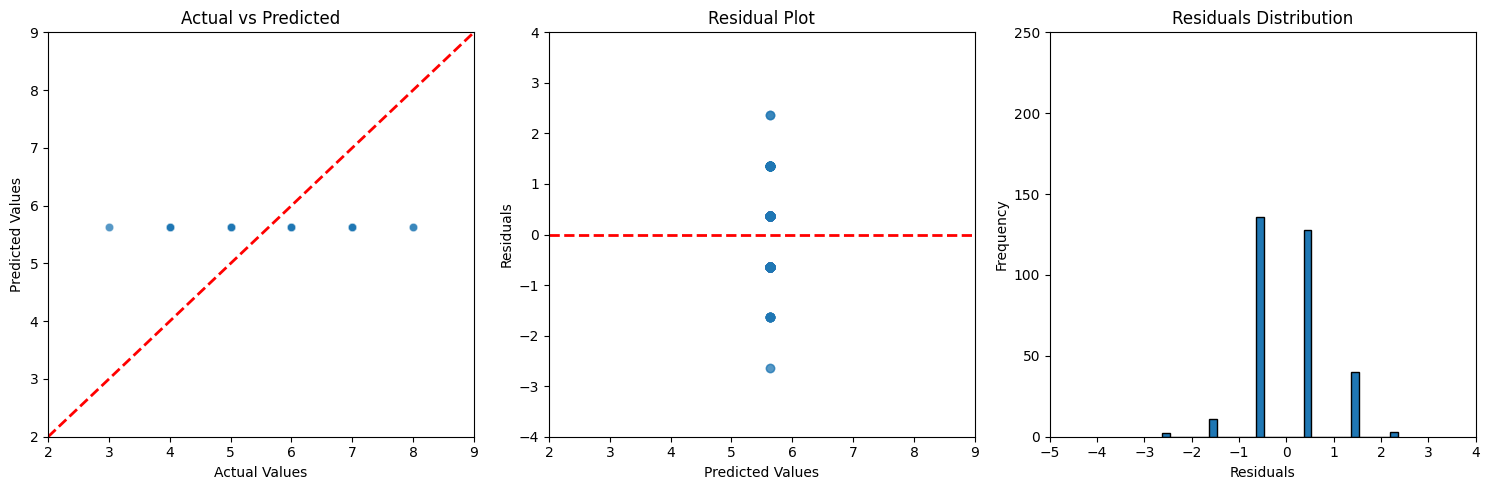



=== KNR ===
MAE: 0.4817650470350312
MSE: 0.5914450857387913
MAPE: 9.016615741549746
RMSE: 0.7690546701885317
R^2: 0.0834194445842329


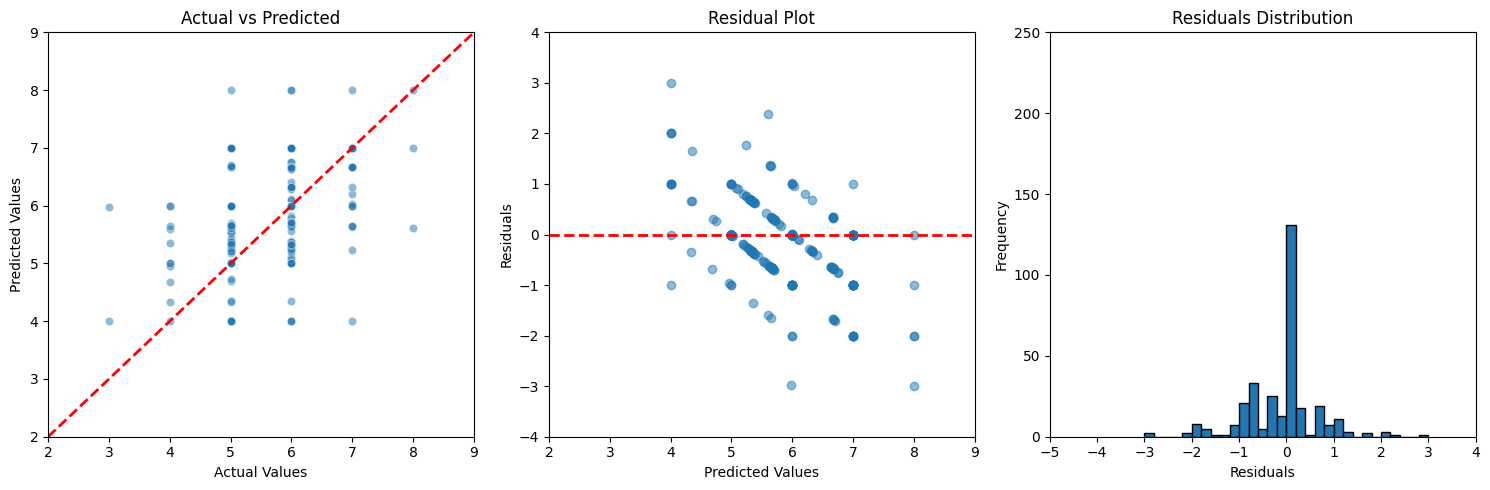



=== MLPRegression ===
MAE: 0.5217751158711893
MSE: 0.48268597867184154
MAPE: 9.667058841134866
RMSE: 0.6947560569522525
R^2: 0.2519667622737972


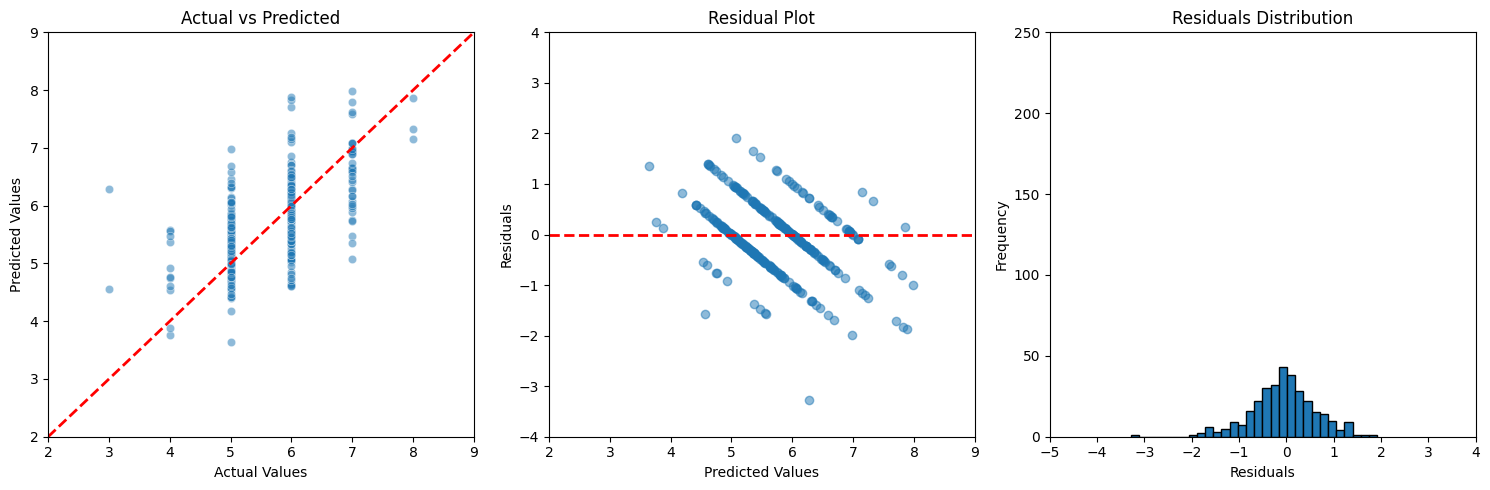

In [29]:
# analyze residuals to detect if there are systematic errors - but only examine the best two models (KNR and MLP)

# define a function that shows all the information (again) for a comprehensive view
def analyze_regression_results(y_true, y_pred):

   # Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = (abs(y_true - y_pred) / y_true).mean() * 100
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Print Metrics
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'MAPE: {mape}')
    print(f'RMSE: {rmse}')
    print(f'R^2: {r2}')

    # Plot Actual vs Predicted
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5, palette='viridis')
    plt.plot([2, 9], [2, 9], color='red', linestyle='--', linewidth=2)
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.xlim(2, 9)
    plt.ylim(2, 9)

    # Plot Residuals
    plt.subplot(1, 3, 2)
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.xlim(2, 9)
    plt.ylim(-4, 4)

    

    # Plot Residuals Distribution
    plt.subplot(1, 3, 3)
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.xlim(-5, 4)
    plt.ylim(0, 250)

    plt.tight_layout()
    plt.show()

print('\n\n=== BASELINE (predict mean of quality for all training data) ===')
mean_training_target = target_train.mean()
# Create a DataFrame with the mean_training_target value for each row
baseline_predictions = pd.DataFrame({'Baseline_Predictions': [mean_training_target] * len(target_test)})
baseline_predictions = baseline_predictions['Baseline_Predictions'].reset_index(drop=True)
target_test_reset = target_test.reset_index(drop=True)
analyze_regression_results(target_test_reset, baseline_predictions)

print('\n\n=== KNR ===')
analyze_regression_results(target_test, knr_predictions)

print('\n\n=== MLPRegression ===')
analyze_regression_results(target_test, mlp_predictions)